In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers,models

In [2]:
from keras import datasets

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
classes=['0','1','2','3','4','5','6','7','8','9']

In [10]:
def plot_sample (x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

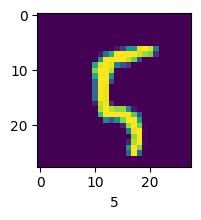

In [11]:
plot_sample(x_train,y_train,100)

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Input shape should be (28, 28, 1) for grayscale images
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
cnn.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 21s 4ms/step - loss: 0.2481 - accuracy: 0.9457
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0673 - accuracy: 0.9793
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9848
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0418 - accuracy: 0.9871
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9891
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - accuracy: 0.9900
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9917
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - accuracy: 0.9925
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9929
Epoch 10/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.02

In [14]:
cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


array([[0.0000000e+00, 3.0544328e-27, 9.5464989e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.7194227e-30, 8.6260914e-25, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.2330078e-24, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 9.7668033e-20, 2.8908260e-38, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5230948e-18, 2.6875416e-33, 1.5441897e-27, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.8221506e-29, 6.6013837e-38, 4.0675270e-28, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [15]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0985 - accuracy: 0.9867


[0.09848941117525101, 0.9866999983787537]